In [49]:
import numpy as np
import pandas as pd
from uncertainties import ufloat
import uncertainties as unc

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.optimize import fmin

# 1. External magnetic field

In [2]:
df = pd.read_csv('data/magnetfeld_messung.csv')
df 
#x in mm
#B in mT

,x,B
0,70,1
1,75,5
2,80,2
3,85,95
4,90,257
5,92,317
6,94,362
7,96,387
8,98,399
9,100,401


In [3]:
ind_start = 3
ind_end = 16

In [4]:
def f(x,a,b,c):
    return a*x**2 + b*x + c

In [5]:
param, cov = curve_fit(f, df['x'][ind_start:ind_end], df['B'][ind_start:ind_end])

name_list = ['a', 'b', 'c']

for param_name, value, var in zip(name_list, param, np.diag(cov)):
    print(f'{param_name} = {value:.2}+-{np.sqrt(var):.2}')

a = -1.4+-0.038
b = 2.9e+02+-7.6
c = -1.4e+04+-3.8e+02


In [6]:
x_lin = np.linspace(df['x'][ind_start], df['x'][ind_end-1], 1000)

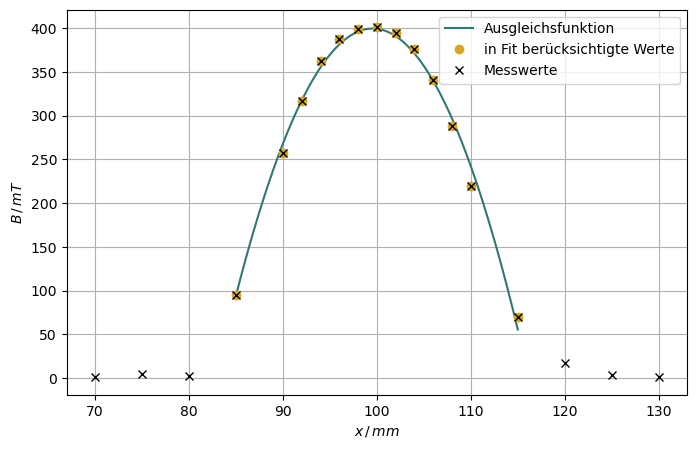

In [7]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(x_lin, f(x_lin, *param), label='Ausgleichsfunktion', color='#317873')
plt.plot(df['x'][ind_start:ind_end], df['B'][ind_start:ind_end], 'o', color='#daa520', label='in Fit berücksichtigte Werte')
plt.plot(df['x'], df['B'], 'x', color='k', label='Messwerte')

plt.grid()
plt.legend()
plt.ylabel(r'$B \,/\, mT$')
plt.xlabel(r'$x \,/\, mm$')

plt.savefig('../figure/magnetfeld.pdf')
plt.show()

In [8]:
def f_mask(x):
    return -f(x, *param)

In [9]:
a = ufloat(param[0], np.sqrt(cov[0,0]))
b = ufloat(param[1], np.sqrt(cov[1,1]))
c = ufloat(param[2], np.sqrt(cov[2,2]))

In [10]:
x_max = fmin(f_mask, 100)[0]
B_max = f(x_max, a, b, c)

print()
print('Max. Magnetfeld:')
print(f'x = {x_max:.2f}mm')
print(f'B = {B_max:.2f}mT')


Optimization terminated successfully.
         Current function value: -399.487187
         Iterations: 17
         Function evaluations: 34

Max. Magnetfeld:
x = 99.55mm
B = 399.49+/-922.77mT


# 2. Read in data and data preprocessing

In [11]:
d_rein = 5.11 * 10**(-3) #m
d_1 = 1.36 * 10**(-3) #m
d_2 = 1.296 * 10**(-3) #m

N_1 = 1.2 * 10**(18) *10**(6) #1/m^3
N_2 = 2.8 * 10**(18) *10**(6) #1/m^3

## Hochreines GaAs

In [12]:
df_rein_raw = pd.read_csv('data/GaAs_rein.csv')
# lam in micro meter
# Winkel t1/t2 in Grad
# Winkel t1min/t2min in Gradminuten

In [13]:
df_rein = pd.DataFrame()
df_rein['lam'] = df_rein_raw['lam']*10**(-6) #m
df_rein['t1'] = np.deg2rad(df_rein_raw['t1'] + df_rein_raw['t1min']/60) #rad
df_rein['t2'] = np.deg2rad(df_rein_raw['t2'] + df_rein_raw['t2min']/60) #rad
df_rein['theta'] = 0.5*(df_rein['t1'] - df_rein['t2'])
df_rein['theta/d'] = df_rein['theta']/d_rein

df_rein

,lam,t1,t2,theta,theta/d
0,0.000001,1.554797,1.143191,0.205803,40.274639
1,0.000001,1.414298,1.163553,0.125373,24.534798
2,0.000001,1.368920,1.192642,0.088139,17.248361
3,0.000002,1.376774,1.192642,0.092066,18.016853
4,0.000002,1.272636,1.143191,0.064723,12.665876
5,0.000002,1.207186,1.125737,0.040724,7.969540
6,0.000002,0.863647,0.772017,0.045815,8.965732
7,0.000003,0.586140,0.523017,0.031561,6.176393
8,0.000003,1.136209,1.060288,0.037961,7.428750


## GaAs n-dotiert 1

In [14]:
df_n1_raw = pd.read_csv('data/GaAs_n1.csv')
# lam in micro meter
# Winkel t1/t2 in Grad
# Winkel t1min/t2min in Gradminuten

In [15]:
df_n1 = pd.DataFrame()
df_n1['lam'] = df_n1_raw['lam']*10**(-6) #m
df_n1['t1'] = np.deg2rad(df_n1_raw['t1'] + df_n1_raw['t1min']/60) #rad
df_n1['t2'] = np.deg2rad(df_n1_raw['t2'] + df_n1_raw['t2min']/60) #rad
df_n1['theta'] = 0.5*(df_n1['t1'] - df_n1['t2'])
df_n1['theta/d'] = df_n1['theta']/d_1

df_n1

,lam,t1,t2,theta,theta/d
0,0.000001,1.362520,1.176643,0.092939,68.337340
1,0.000001,1.257510,1.140282,0.058614,43.098510
2,0.000001,1.270600,1.198459,0.036070,26.522160
3,0.000002,1.233366,1.131555,0.050905,37.430468
4,0.000002,1.178097,1.071923,0.053087,39.034631
5,0.000002,1.111193,0.999201,0.055996,41.173515
6,0.000002,0.795579,0.677770,0.058905,43.312399
7,0.000003,0.478511,0.453786,0.012363,9.090257
8,0.000003,1.099848,0.975057,0.062396,45.879059


## GaAs n-dotiert 2

In [16]:
df_n2_raw = pd.read_csv('data/GaAs_n2.csv')
# lam in micro meter
# Winkel t1/t2 in Grad
# Winkel t1min/t2min in Gradminuten

In [17]:
df_n2 = pd.DataFrame()
df_n2['lam'] = df_n2_raw['lam']*10**(-6) #m
df_n2['t1'] = np.deg2rad(df_n2_raw['t1'] + df_n2_raw['t1min']/60) #rad
df_n2['t2'] = np.deg2rad(df_n2_raw['t2'] + df_n2_raw['t2min']/60) #rad
df_n2['theta'] = 0.5*(df_n2['t1'] - df_n2['t2'])
df_n2['theta/d'] = df_n2['theta']/d_2

df_n2

,lam,t1,t2,theta,theta/d
0,0.000001,1.375901,1.140282,0.117810,90.902565
1,0.000001,1.271181,1.069014,0.101084,77.996645
2,0.000001,1.317724,1.195551,0.061087,47.134663
3,0.000002,1.329359,1.153372,0.087994,67.896360
4,0.000002,1.220276,1.069014,0.075631,58.357202
5,0.000002,1.207186,1.055924,0.075631,58.357202
6,0.000002,0.907571,0.695223,0.106174,81.924534
7,0.000003,0.475020,0.219621,0.127700,98.533892
8,0.000003,1.186533,0.951204,0.117664,90.790340


# 3. Plot $\lambda^2$ against the rotation angle $\theta$

In [18]:
plt.rcParams.update({'font.size': 15})

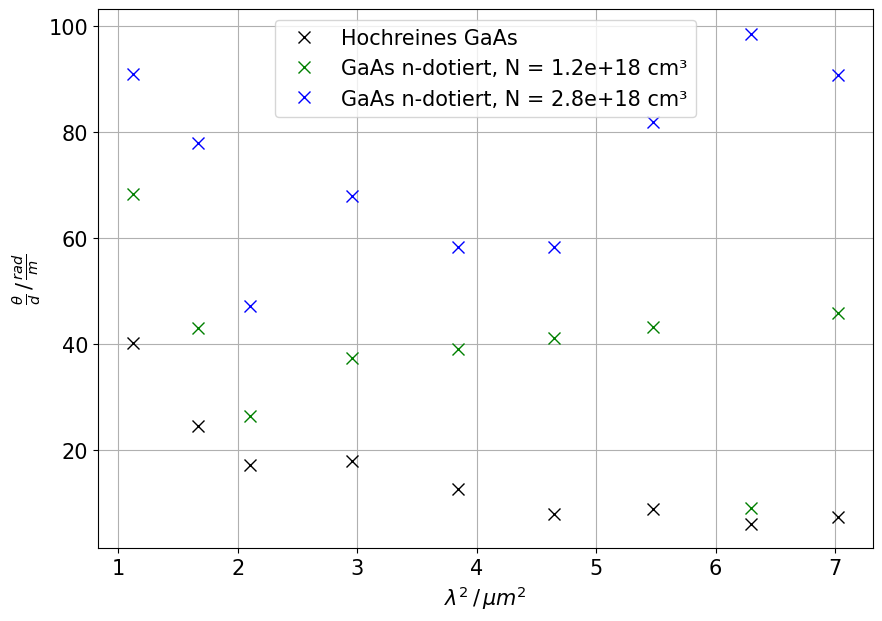

In [28]:
plt.figure(figsize=(10,7), dpi=100)
plt.plot((df_rein['lam']*10**6)**2, df_rein['theta/d'], 'kx', label='Hochreines GaAs', markersize=8)
plt.plot((df_n1['lam']*10**6)**2, df_n1['theta/d'], 'gx', label=f'GaAs n-dotiert, N = {N_1*10**(-6)} cm³', markersize=8)
plt.plot((df_n2['lam']*10**6)**2, df_n2['theta/d'], 'bx', label=f'GaAs n-dotiert, N = {N_2*10**(-6)} cm³', markersize=8)


plt.xlabel(r'$\lambda^2 \,/\, \mu m^2$')
plt.ylabel(r'$\frac{\theta}{d} \,/\, \frac{rad}{m}$')
plt.legend()
plt.grid()
plt.savefig('../figure/theta_lam2.pdf')
plt.show()

# 4. Calculate the difference between n-doted and hyperpure GaAs sample, linear Regression

In [29]:
lam = df_n1['lam'].to_numpy()
theta_n1_dif = (df_n1['theta/d'] - df_rein['theta/d']).to_numpy()
theta_n2_dif = (df_n2['theta/d'] - df_rein['theta/d']).to_numpy()

In [30]:
def f_lin(x, a):
    return a*x

In [31]:
param1, cov1 = curve_fit(f_lin, lam**2, theta_n1_dif, p0=[10**(13)])
a1 = ufloat(param1, np.sqrt(cov1))
print(f'a1 = {a1} rad/m^3')

a1 = (5.1+/-1.1)e+12 rad/m^3


In [32]:
param2, cov2 = curve_fit(f_lin, lam**2, theta_n2_dif, p0=[10**(13)])
a2 = ufloat(param2, np.sqrt(cov2))
print(f'a1 = {a2} rad/m^3')

a1 = (1.35+/-0.14)e+13 rad/m^3


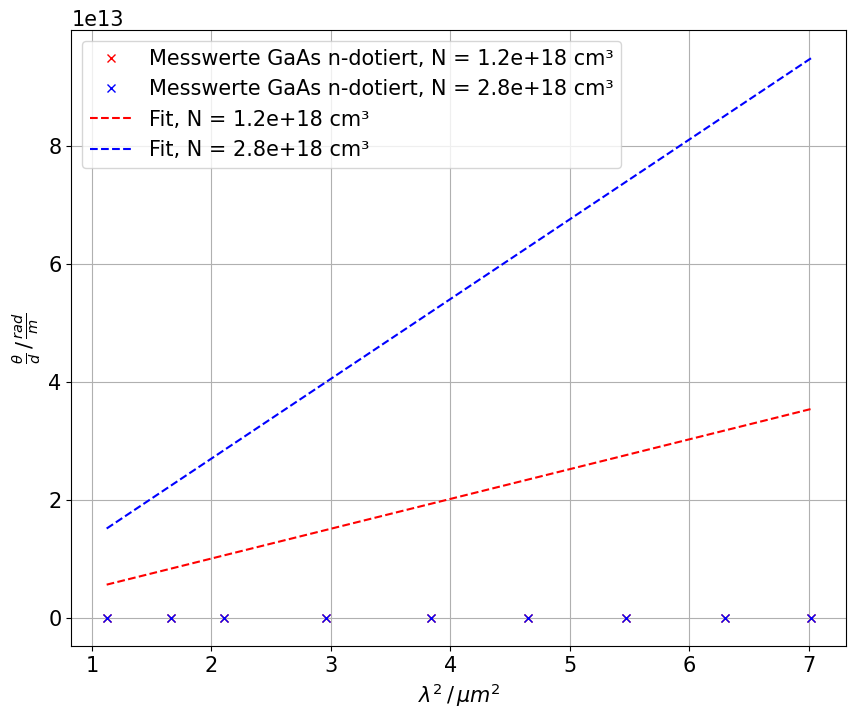

In [34]:
plt.figure(figsize=(10,8), dpi=100)
plt.plot((lam*10**6)**2, theta_n1_dif, 'rx', label = f'Messwerte GaAs n-dotiert, N = {N_1*10**(-6)} cm³')
plt.plot((lam*10**6)**2, theta_n2_dif, 'bx', label = f'Messwerte GaAs n-dotiert, N = {N_2*10**(-6)} cm³')

plt.plot((lam*10**6)**2, f_lin((lam*10**6)**2, a1.nominal_value), 'r--', label=f'Fit, N = {N_1*10**(-6)} cm³')
plt.plot((lam*10**6)**2, f_lin((lam*10**6)**2, a2.nominal_value), 'b--', label=f'Fit, N = {N_2*10**(-6)} cm³')

plt.xlabel(r'$\lambda^2 \,/\, \mu m^2$')
plt.ylabel(r'$\frac{\theta}{d} \,/\, \frac{rad}{m}$')

plt.grid()
plt.legend()
plt.savefig('../figure/theta_lam2_dif.pdf')
plt.show()

# 5. Effective mass

$\huge \theta_\text{frei} = a \cdot \lambda^2$

$\huge \text{mit} \quad a = \frac{e_0^3}{8 \pi^2 \epsilon_0 c^3} \frac{1}{{m^*}^2} \frac{N B}{n}$

$\huge \Rightarrow m^* = \sqrt{\frac{e_0^3}{8 \pi^2 \epsilon_0 c^3} \frac{1}{a} \frac{N B}{n}}$

In [39]:
e_0 = 1.602 *10**(-19) #C
eps_0 = 8.854 *10**(-12) #A*s/V*m
c_const = 299792458 #m/s
n_brech = 3.346
m_e = 9.109 * 10**(-31) #kg

In [68]:
def m_func(a, N, B):
    _ = e_0**3 * N * B / (8 * np.pi**2 * eps_0 * c_const**3 * n_brech * a)
    return _**(1/2)

In [69]:
m1 = m_func(a1, N_1, B_max.nominal_value*10**(-3))
print(f'm1* = {m1} Kg = {m1/m_e} m_e')

m1* = (7.9+/-0.9)e-32 Kg = 0.086+/-0.009 m_e


In [72]:
m2 = m_func(a2, N_2, B_max.nominal_value*10**(-3))
print(f'm2* = {m2} Kg = {m2/m_e} m_e')

m2* = (7.3+/-0.4)e-32 Kg = 0.081+/-0.004 m_e


# 6. Deviation to theoretical value

In [73]:
m_th = 0.067 #m_e

In [77]:
print('Deviation of the effective mass to the theoretical value:')
print(f'N_1: {((m1/m_e)-m_th)*100/m_th}%')
print(f'N_2: {((m2/m_e)-m_th)*100/m_th}%')

Deviation of the effective mass to the theoretical value:
N_1: 29+/-14%
N_2: 20+/-6%
